<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning_workshop/blob/master/multilayer_perceptron/08_workshop_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# **Data**
---
Este es un problema en el que, dado un año y un mes, la tareas es predecir el número de pasajeros de aerolineas internecionales en unidades de 1.000. Los datos van desde enero de 1949 hasta diciembre de 1960 o 12 años, con 144 observaciones.


In [2]:
url = 'https://raw.githubusercontent.com/jinfagang/LSTM_learn/master/international-airline-passengers.csv'
data = pd.read_csv(url, usecols=[1], engine="python")
data_values = data.values.astype('float32')

# **Data Split**
---



In [3]:
train_size = int(len(data_values)*0.67)
test_size = len(data_values) - train_size
train, test = data_values[:train_size,:], data_values[train_size:, :]

# **Create Data**
---



In [4]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data)-loock_back-1): 
    item_x = data[i: (i+loock_back), 0]
    item_y = data[i+loock_back,0]
    dataX.append(item_x)
    dataY.append(item_y)
  return np.array(dataX), np.array(dataY)

In [5]:
loock_back = 1
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz especifica en forma de [muestras, pasos de tiempo (ventana), caracteristicas]<br><br>
Los datos preparados tienen la forma: [muestras, carcteristicas]<br><br>

# **Diseño de Model**
---
- Capa visible con 1 entrada
- Capa oculta con 8 neuronas
- Capa de salida
- Modelo se ajusta usando el error cuadratico medio


In [6]:
model = Sequential()
model.add(Dense(8, input_dim = loock_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 0)

# **Estimar rendimiento**
---

In [7]:
train_score = model.evaluate(trainX, trainY, verbose = 0)
test_score = model.evaluate(testX, testY, verbose = 0)
print('Puntuación Entrenamiento %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
print('Puntuación Validación %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Puntuación Entrenamiento 532.17 MSE (23.07 RMSE)
Puntuación Validación 2354.89 MSE (48.53 RMSE)


In [8]:
print(f"El modelo falla en aprocimadamente {math.sqrt(train_score)} mil pasajeros por mes para los datos de entrenamiento")
print(f"El modelo falla en aprocimadamente {math.sqrt(test_score)} para los datos de validación ")

El modelo falla en aprocimadamente 23.068845460043615 mil pasajeros por mes para los datos de entrenamiento
El modelo falla en aprocimadamente 48.5272480038599 para los datos de validación 


# **Predicción**
---



In [9]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# **Resultados**
---



# **Plot**
---



In [10]:
train_predict_plot = np.empty_like(data_values)
train_predict_plot[:,:] = np.nan
train_predict_plot[loock_back: len(train_predict)+loock_back, :] = train_predict

test_predict_plot = np.empty_like(data_values)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(loock_back*2)+1: len(data_values)-1:] = test_predict

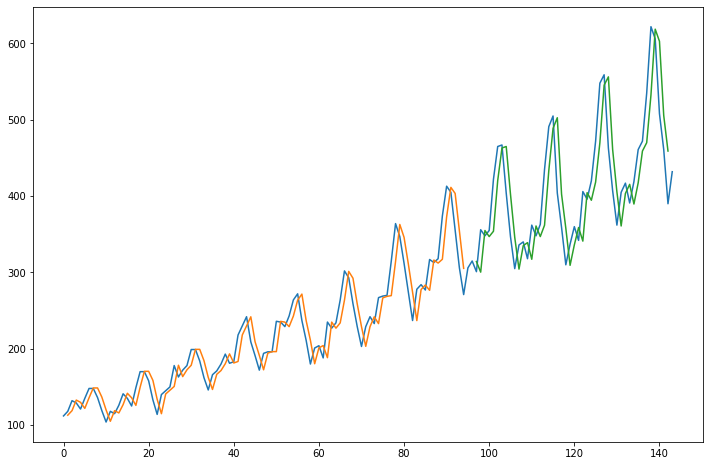

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data_values)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

- Se puede apreciar que el modelo ha hecho un trabajo bastante pobre a la hora de ajustar. Tanto en el entrenamiento como en la validación. **Básicamente, lo que ha hecho es predecir el mismo valor de entrada que la salida.**



- Una red Multilayer perceptron es una arquitectura pesima para trabajar con series de tiempo. 

# **Diseño de Model Mejoras**
---
- Capa visible con 3 entrada
- Capa oculta con 14 neuronas
- Agrega una segunda capa oculta con 8 neuronas
- Capa de salida
- Modelo se ajusta usando el error cuadratico medio
- Aumenta el número de epocas de 400

# **Create Data**
---

In [12]:
loock_back = 3
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

In [13]:
model = Sequential()
model.add(Dense(14, input_dim = 3, activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [14]:
model.fit(trainX, trainY, epochs = 400, batch_size = 2, verbose = 0)

# **Estimar rendimiento**
---

In [15]:
train_score = model.evaluate(trainX, trainY, verbose = 0)
test_score = model.evaluate(testX, testY, verbose = 0)
print('Puntuación Entrenamiento %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
print('Puntuación Validación %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Puntuación Entrenamiento 397.47 MSE (19.94 RMSE)
Puntuación Validación 2012.80 MSE (44.86 RMSE)


In [16]:
print(f"El modelo falla en aprocimadamente {math.sqrt(train_score)} mil pasajeros por mes para los datos de entrenamiento")
print(f"El modelo falla en aprocimadamente {math.sqrt(test_score)} para los datos de validación ")

El modelo falla en aprocimadamente 19.93655249756791 mil pasajeros por mes para los datos de entrenamiento
El modelo falla en aprocimadamente 44.86425380557722 para los datos de validación 


# **Predicción**
---



In [17]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# **Plot**
---

In [18]:
train_predict_plot = np.empty_like(data_values)
train_predict_plot[:,:] = np.nan
train_predict_plot[loock_back: len(train_predict)+loock_back, :] = train_predict

test_predict_plot = np.empty_like(data_values)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(loock_back*2)+1: len(data_values)-1:] = test_predict

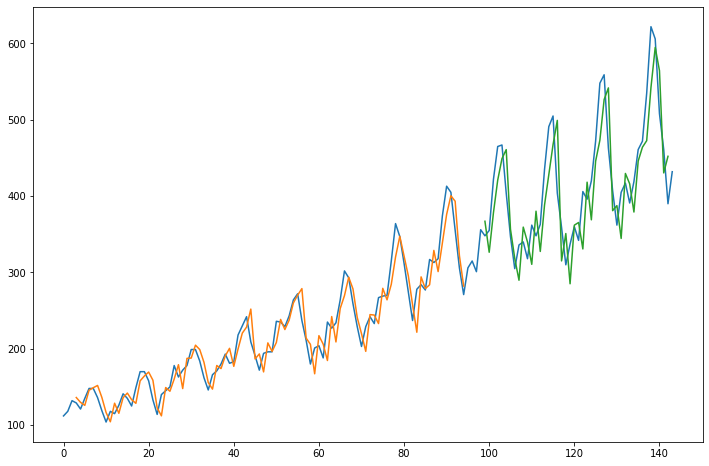

In [19]:
plt.figure(figsize=(12,8))
plt.plot(data_values)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

- Aun persiste un mal ajuste con un modelo tradicional., pese algunas mejoras